# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Mohd Suhel


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

The dataset contained about 7787 records, and 12 attributes.

We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using Count-vectorizer.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




**The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other, and recommend by movies/shows**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Import Libraries

import numpy as np 
import pandas as pd 
import math 
from numpy import loadtxt

#libraries using for visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from matplotlib import rcParams 
import datetime

#library using for Missing values visualization
import missingno as msno

#libraries using for remove warning
import warnings 
warnings.filterwarnings('ignore')

#libraries using for stemming
import string 
string.punctuation

import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 
from nltk.stem.snowball import SnowballStemmer 
from nltk.stem import WordNetLemmatizer

#libraries using for token and vectorization
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#libraries using for Kmeans algo
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

#libraries using for hierarchy and dendrogram
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

#libraries using for recommendation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics.pairwise import rbf_kernel 
from sklearn.metrics.pairwise import polynomial_kernel 
from sklearn.metrics.pairwise import sigmoid_kernel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
#mount drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dir='/content/drive/MyDrive/Colab Notebooks/data/'

data = pd.read_csv(dir + 'NETFLIX MOVIES & SHOWS .csv')


### Dataset First View

In [4]:
# Dataset First Look
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape
print(f'The total number of rows in the dataset : {data.shape[0]}')
print(f'The total number of columns in the dataset : {data.shape[1]}')


The total number of rows in the dataset : 7787
The total number of columns in the dataset : 12


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data[data.duplicated()].count()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 3631 null values in the dataset -

2389 null values in director column.

718 null values in cast column.

507 null values in country column. 

10 null values in date_added column.

7 null values in rating column. 

**so we need to handle the null values.**

<Axes: >

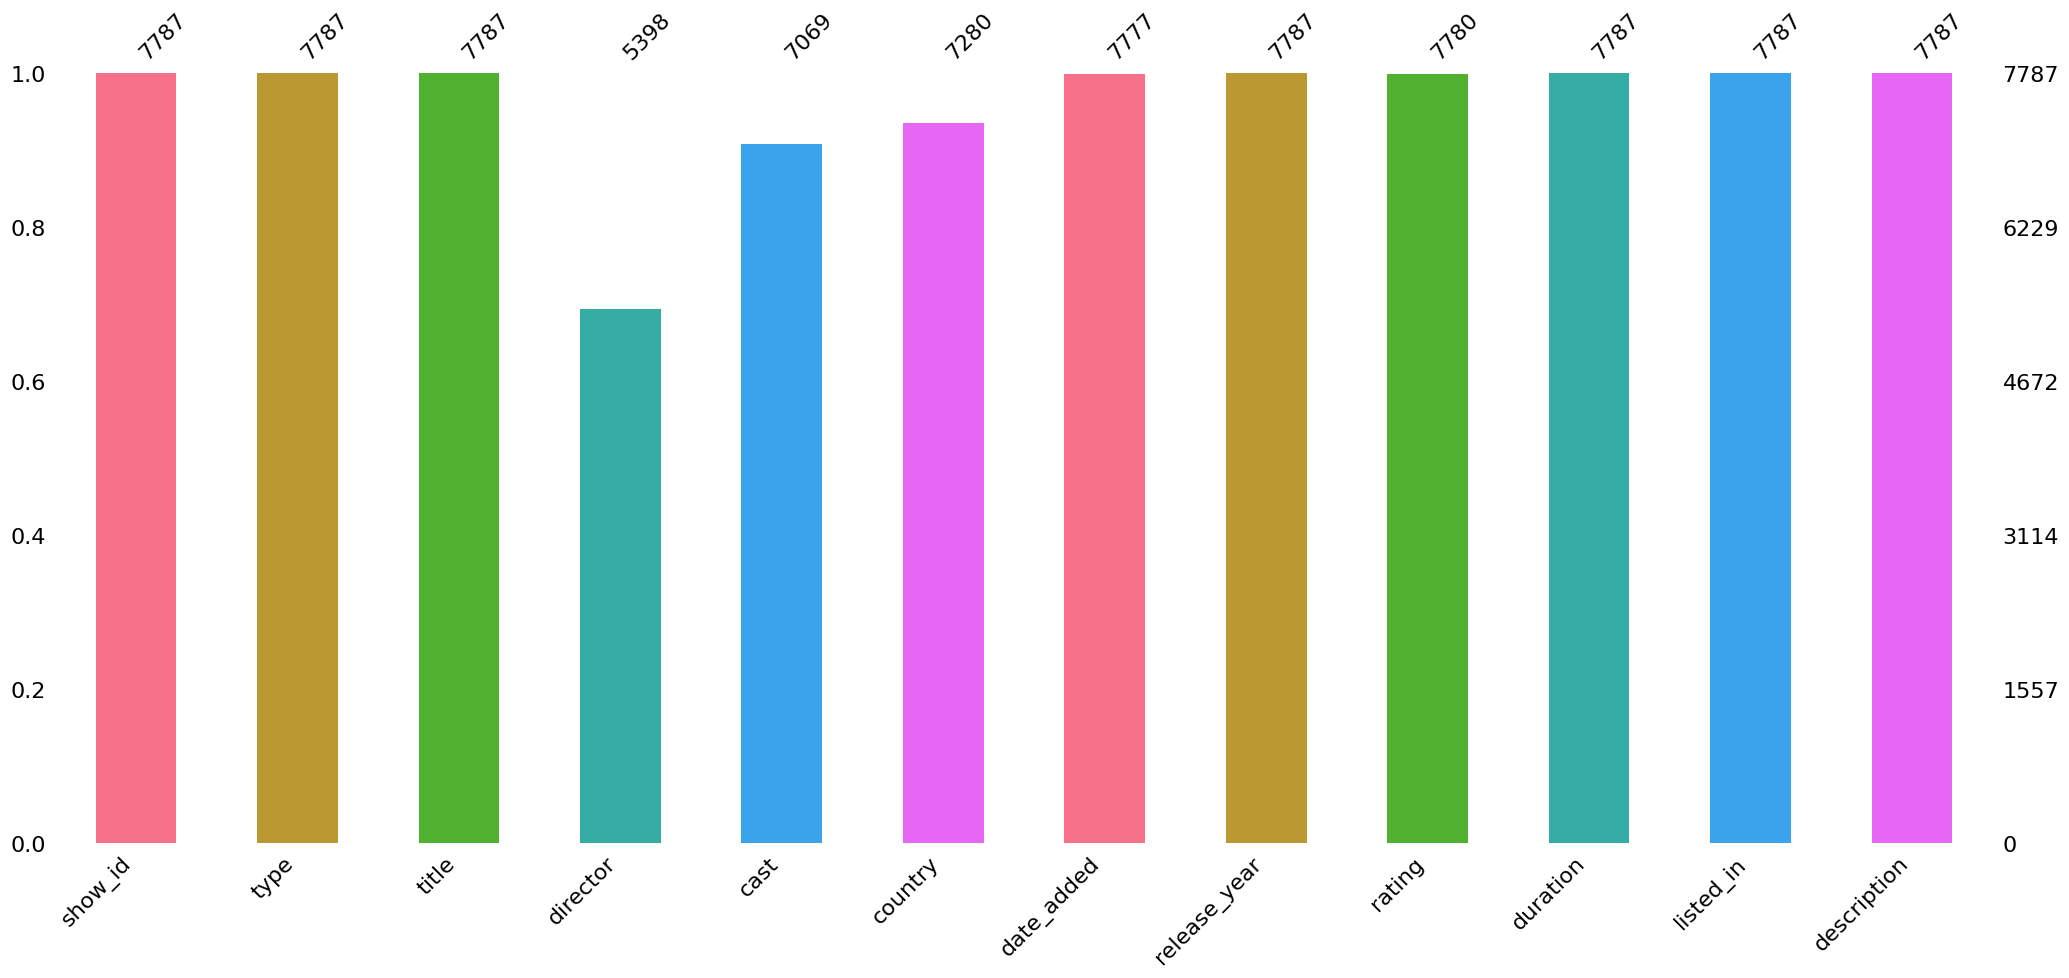

In [9]:
msno.bar(data,color=sns.color_palette('husl'))

### What did you know about your dataset?

There are 7787 Rows and 12 Columns in the dataset, and Not found any duplicated entries inside the dataset. 

There are 3631 null values in the dataset, 

2389 null values in director column,

718 null values in cast column ,

507 null values in country column ,

10 in date_added and

7 in rating. 

so we need to handle the null values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
# Dataset Describe
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in data:
  print('Unique values of',column,'have :',data[column].nunique())


Unique values of show_id have : 7787
Unique values of type have : 2
Unique values of title have : 7787
Unique values of director have : 4049
Unique values of cast have : 6831
Unique values of country have : 681
Unique values of date_added have : 1565
Unique values of release_year have : 73
Unique values of rating have : 14
Unique values of duration have : 216
Unique values of listed_in have : 492
Unique values of description have : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# Write your code to make your dataset analysis ready.
#copy data to another variable
df=data.copy()

#### null values 

In [11]:
 # Missing values to make our Dataset to accesible.

# For Categorical columns we will impute "Missing" in place of NaN
df[['director','cast','country']] = df[['director','cast','country']].fillna('Missing')

# For Rating column we will impute 0 in place of NaN
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [12]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [13]:
# Droping the remaining null values.

df.dropna(axis=0,inplace = True)

In [14]:
# from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [15]:
# Add Month column
df['month_added'] = df['date_added'].dt.month

# Add Month name column
df['month_name_added'] = df['date_added'].dt.month_name()

# Add Year column
df['year_added'] = df['date_added'].dt.year

In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,Missing,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020


#### Rating in Layman language

In [17]:
#Getting the unique values in ratings column
df['rating'].unique()
    

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

TV-MA': For Mature Audiences

'R': Restricted, May be inappropriate for ages under 17.

'PG-13': ParentalGuidance13

'TV-14': 'Teen'

'TV-PG': 'Family-friendly'

'NR': NotRated

'TV-G': 'General',

'TV-Y': 'Designed to be appropriate for all children'

'TV-Y7': Suitable for ages 7 and up

'PG': Parental Guidance suggested

'G': Suitable for General Audiences

'NC-17': Inappropriate for ages 17 and under

'TV-Y7-FV': TVY7FantasyViolence

'UR': Unrated

In [18]:
# Replace the rating values to Layman languge
rating_encode={
    'TV-MA': 'Mature',
    'R': 'Restricted for 17',
    'PG-13': 'Parental-Guidance-13',
    'TV-14': 'Teen',
    'TV-PG': 'Family-friendly',
    'NR': 'Not-Rated',
    'TV-G': 'General',
    'TV-Y': 'Children',
    'TV-Y7': 'Youth',
    'PG': 'Parental Guidance',
    'G': 'General',
    'NC-17': 'Adults Only',
    'TV-Y7-FV': 'Fantasy Violence',
    'UR': 'Unrated'}



In [19]:
df['Rating in Layman']=df['rating'].replace(rating_encode)

In [20]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,Rating in Layman
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Mature
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mature
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Restricted for 17
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017,Parental-Guidance-13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020,Parental-Guidance-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020,Mature
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,Teen
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,Missing,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020,Mature
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020,Family-friendly


#### only movies dataset

In [21]:
# dataset of only movies  
only_movie=df[df['type']=='Movie']
only_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,Rating in Layman
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mature
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Restricted for 17
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017,Parental-Guidance-13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020,Parental-Guidance-13
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6,June,2020,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020,Parental Guidance
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020,Mature
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,Teen
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,Missing,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020,Mature


#### only tv shows dataset

In [22]:
# dataset of only Tv shows
only_tvshows=df[df['type']=='TV Show']
only_tvshows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,Rating in Layman
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Mature
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7,July,2017,Mature
11,s12,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",11,November,2018,Mature
12,s13,TV Show,1994,Diego Enrique Osorno,Missing,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,5,May,2019,Mature
16,s17,TV Show,Feb-09,Missing,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Missing,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",3,March,2019,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",12,December,2016,Family-friendly
7775,s7776,TV Show,Zoids Wild,Missing,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,8,August,2020,Youth
7777,s7778,TV Show,Zombie Dumb,Missing,Missing,Missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,July,2019,Youth
7779,s7780,TV Show,Zona Rosa,Missing,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,11,November,2019,Mature


In [23]:
only_tvshows[only_tvshows['country']=='India'].head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,Rating in Layman
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,Missing,"Luke Kenny, Mohit Raina, Mukul Dev",India,2018-12-01,2018,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",12,December,2018,Teen
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,7,July,2019,Teen
340,s341,TV Show,Agent Raghav,Missing,"Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...",India,2017-04-15,2015,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...","A mix of brilliance, erudition and skill enabl...",4,April,2017,Teen
364,s365,TV Show,Akbar Birbal,Missing,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,2020-03-31,2019,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",3,March,2020,General
533,s534,TV Show,Anjaan: Rural Myths,Missing,Missing,India,2018-12-15,2018,TV-14,1 Season,"International TV Shows, TV Horror, TV Thrillers",Spine-chilling stories of malevolent spirits u...,12,December,2018,Teen
534,s535,TV Show,Anjaan: Special Crimes Unit,Missing,"Gashmeer Mahajani, Heena Parmar",India,2018-05-01,2018,TV-14,1 Season,"International TV Shows, TV Horror, TV Mysteries",The cases are supernatural; the police officer...,5,May,2018,Teen
686,s687,TV Show,Bad Boy Billionaires: India,Missing,Missing,India,2020-10-05,2020,TV-14,1 Season,"British TV Shows, Docuseries, International TV...",This investigative docuseries explores the gre...,10,October,2020,Teen
698,s699,TV Show,Badalte Rishton Ki Dastaan,Missing,"Additi Gupta, Sanjeeda Sheikh, Kiran Karmarkar...",India,2017-04-01,2013,TV-14,1 Season,"International TV Shows, TV Dramas","When a man is killed, his wife and his lover –...",4,April,2017,Teen
750,s751,TV Show,Bard of Blood,Missing,"Emraan Hashmi, Viineet Kumar, Sobhita Dhulipal...",India,2019-09-27,2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Years after a disastrous job in Balochistan, a...",9,September,2019,Mature
856,s857,TV Show,Betaal,Missing,"Viineet Kumar, Aahana Kumra, Suchitra Pillai, ...",India,2020-05-24,2020,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...",Hired to displace tribal villagers to make way...,5,May,2020,Mature


#### Lead Cast

In [24]:

def top_cast(text):
  j=str(text)
  return ','.join(j.split(','))



In [25]:
df['lead Cast']=df['cast'].apply(top_cast)

In [26]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,Rating in Layman,lead Cast
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Mature,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mature,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Restricted for 17,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017,Parental-Guidance-13,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020,Parental-Guidance-13,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020,Mature,"Imad Creidi, Antoinette Turk, Elias Gergi, Car..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,Teen,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
7784,s7785,Movie,Zulu Man in Japan,Missing,Nasty C,Missing,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9,September,2020,Mature,Nasty C
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020,Family-friendly,"Adriano Zumbo, Rachel Khoo"


### What all manipulations have you done and insights you found?

we found from the data


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
def witt(plot, feature):
    total = len(feature)
    for p in plot.patches:
      percentage = str(round(100*(p.get_height()/total),1))+'%'
      x = p.get_x() + p.get_width() / 2 - 0.1
      y = p.get_y() + p.get_height() +20
      print(y)
      ax.annotate(percentage, (x, y), size = 15)

#### Chart - 1 Shows Type(Univariate)

2430.0
5397.0


Text(0, 0.5, 'Count')

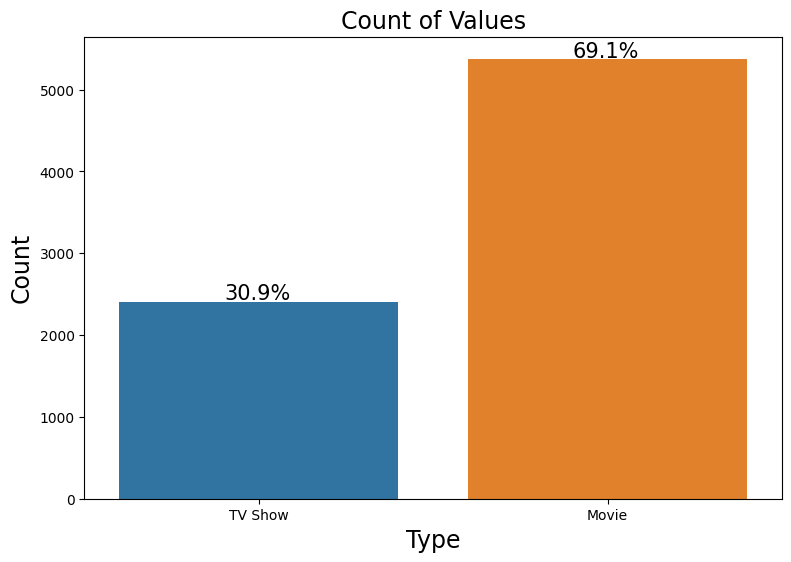

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(9,6))

ax=sns.countplot(x = 'type', data = data)
witt(ax,data['type'])

plt.title('Count of Values', size=17)
plt.xlabel('Type', fontsize = 17)
plt.ylabel('Count', fontsize = 17)



Text(0.5, 1.0, 'Percentage Distribution')

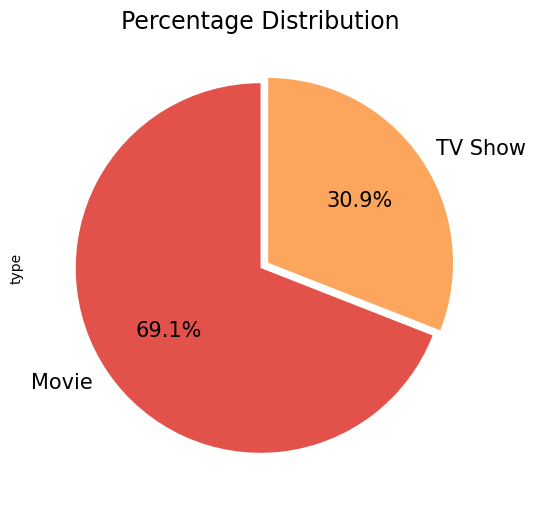

In [ ]:
plt.figure(figsize=(8,6))

data['type'].value_counts().plot(kind='pie',  
                                 fontsize=15,
                                 autopct="%0.1f%%",
                                 labels=data['type'].value_counts().index,
                                 explode=[0,0.05],
                                 colors = sns.color_palette("Spectral"),
                                 startangle=90)

plt.title('Percentage Distribution', size=17)

##### 1. Why did you pick the specific chart?

Bar and pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and bar which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above charts i got that **Movies - 69.1%** while **TV Shows - 30.9% .**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the insights show us that most of the data is of movies.

#### Chart - 2  -  Top 10 directors (Univariate)

Text(0, 0.5, 'Director')

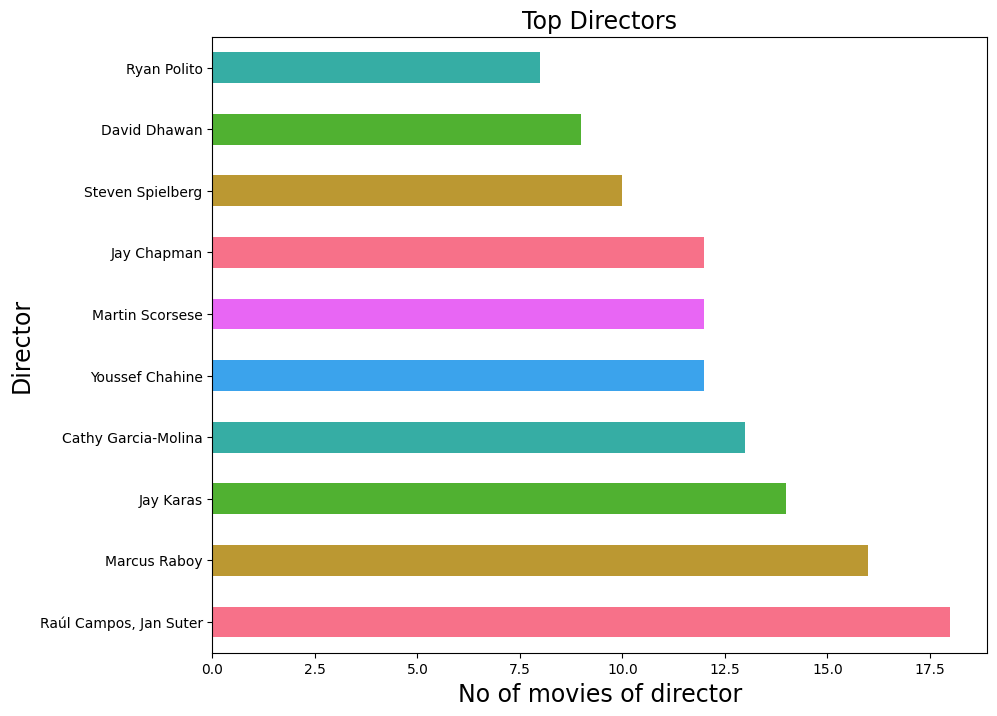

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))

data['director'].value_counts().head(10).plot(kind='barh',width=0.5,color = sns.color_palette("husl"))

plt.title('Top Directors', size=17)
plt.xlabel('No of movies of director', fontsize = 17)
plt.ylabel('Director', fontsize = 17)

##### 1. Why did you pick the specific chart?

Bar plot is well suited for finding the counts and plotting the count values.

Horizontal bar is good to visualize the data and interpret the data

##### 2. What is/are the insight(s) found from the chart?

From above charts we found Top 10 director who direct maximum movie /shows.

Raul Campus ,jan suter direct maximum movies/shows and Marcus Raboy is runner up.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


This charts insights top director list.

#### Chart - 3 -  Top 10 Countries Contributed on Netflix( Univariate)

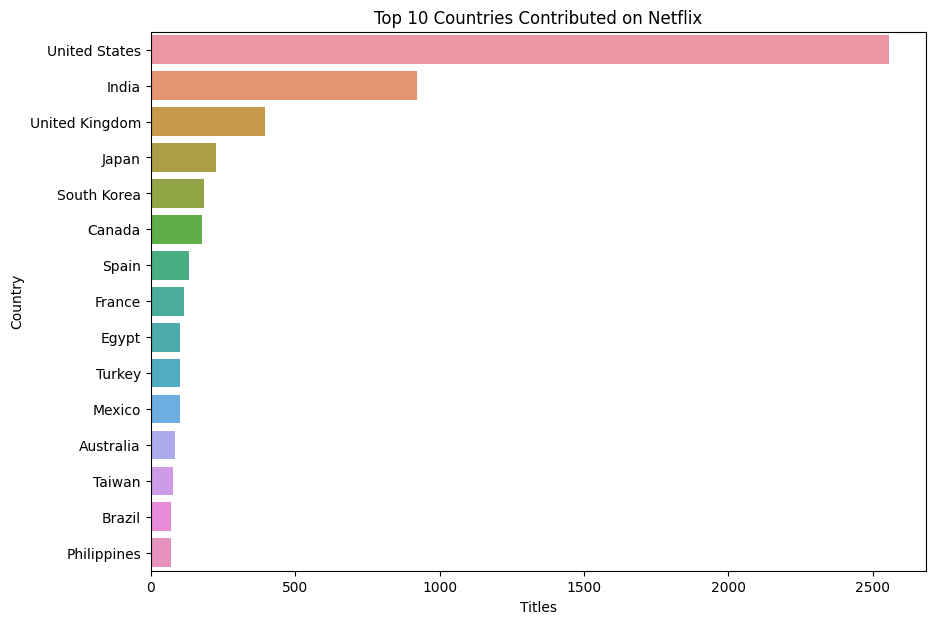

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(10,7))
g = sns.countplot(y = data['country'], order=data['country'].value_counts().index[:15])
plt.title('Top 10 Countries Contributed on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()
     


2575
943
417
246
203
197
154
135
121
120
120
103
98
92
91


Text(0, 0.5, 'Movie Count')

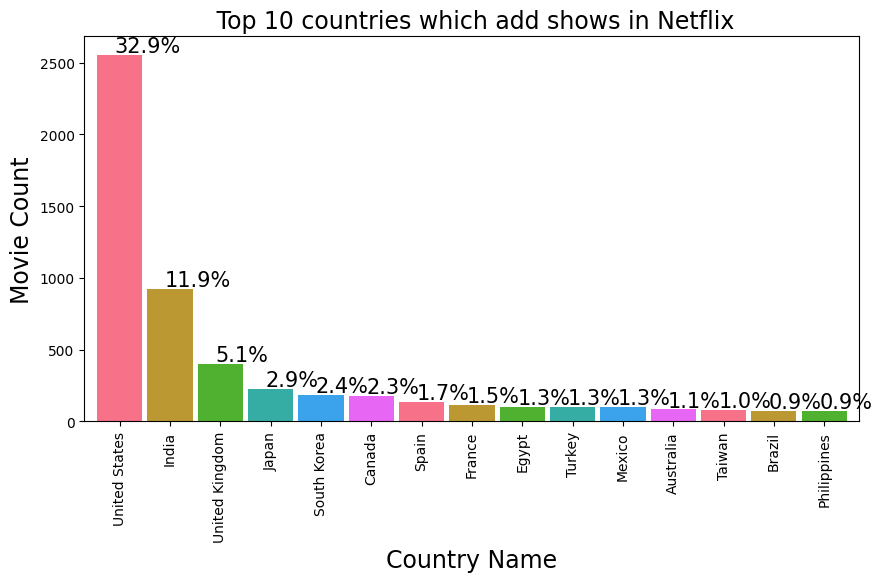

In [ ]:
plt.figure(figsize=(10,5))

ax=data['country'].value_counts().head(15).plot(kind='bar',color = sns.color_palette("husl"),width=0.9)
witt(ax,df['country'])

plt.title(' Top 10 countries which add shows in Netflix',fontsize = 17)
plt.xlabel('Country Name', fontsize = 17)
plt.ylabel('Movie Count', fontsize = 17)

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

Horizontal bar is good to visualize the data and interpret the data

##### 2. What is/are the insight(s) found from the chart?

the content belongs to United states alone, followed by India. US alone covered 32% of whole and India in 2nd place.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It helps us understand that most of the data we have belongs to United states followed by India

#### Chart - 4 Highly production Year (Univariate)

Text(0, 0.5, 'Movies Count')

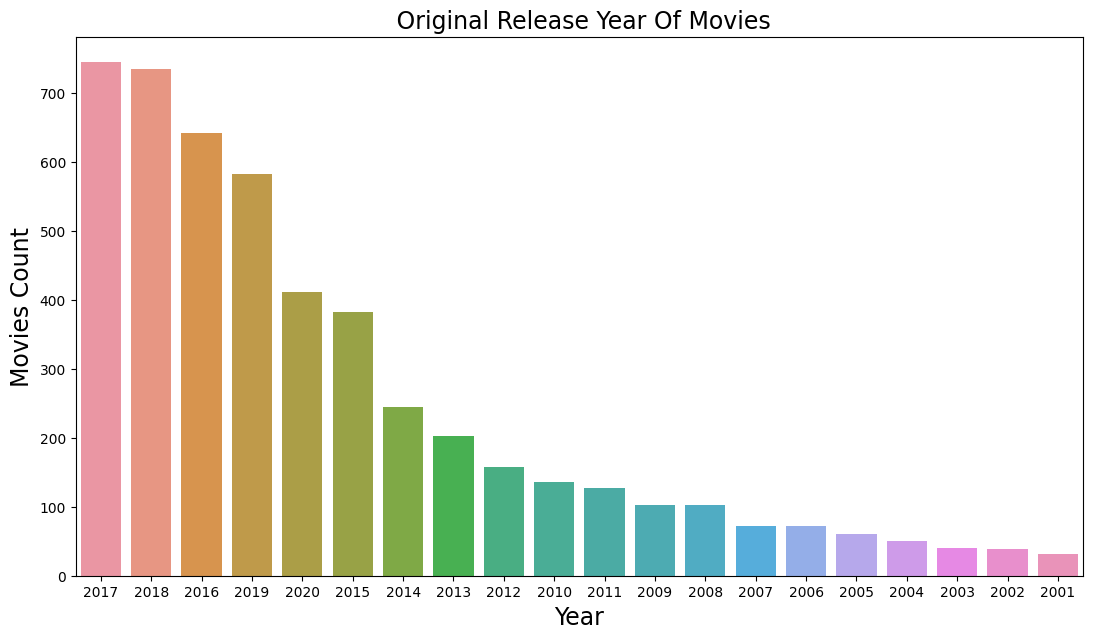

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(13,7))

sns.countplot(x="release_year", data=only_movie,order=only_movie['release_year'].value_counts().index[0:20])

plt.title(' Original Release Year Of Movies', size=17)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Movies Count', fontsize = 17)

Text(0, 0.5, 'TV Shows Count')

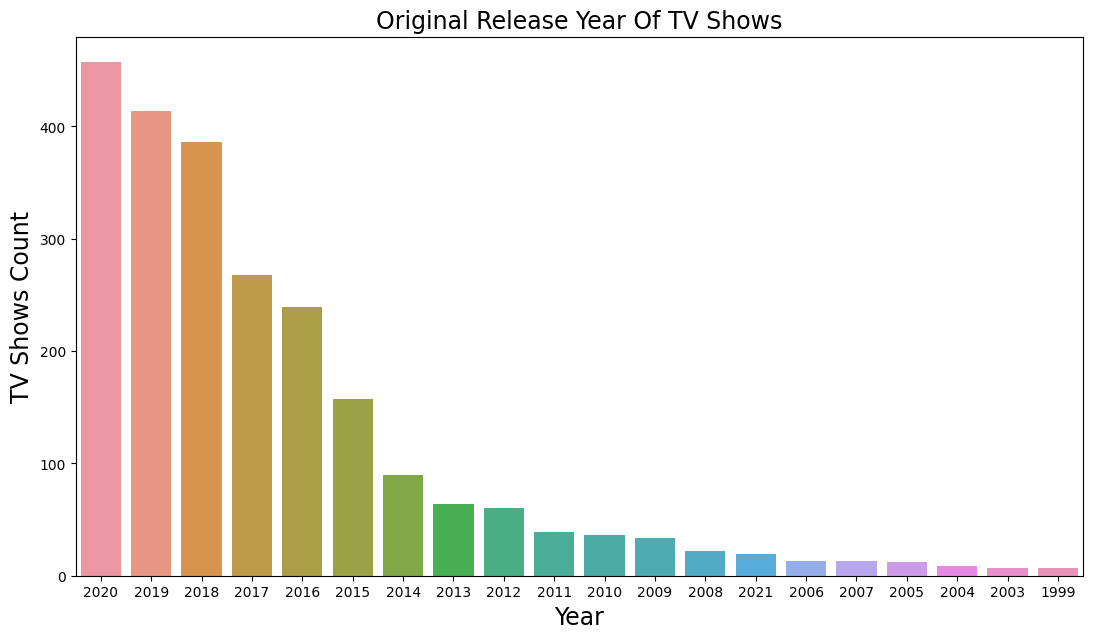

In [ ]:
plt.figure(figsize=(13,7))

sns.countplot(x="release_year",  data=only_tvshows,order=only_tvshows['release_year'].value_counts().index[0:20])

plt.title('Original Release Year Of TV Shows', size=17)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('TV Shows Count', fontsize = 17)



##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we found original release year of movies/ shows-

year 2017 most movies released.

Year 2020 most TV Shows released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it impact positively because Production High in this year.

#### Chart - 5 -  Top genres used in netflix( univariate)

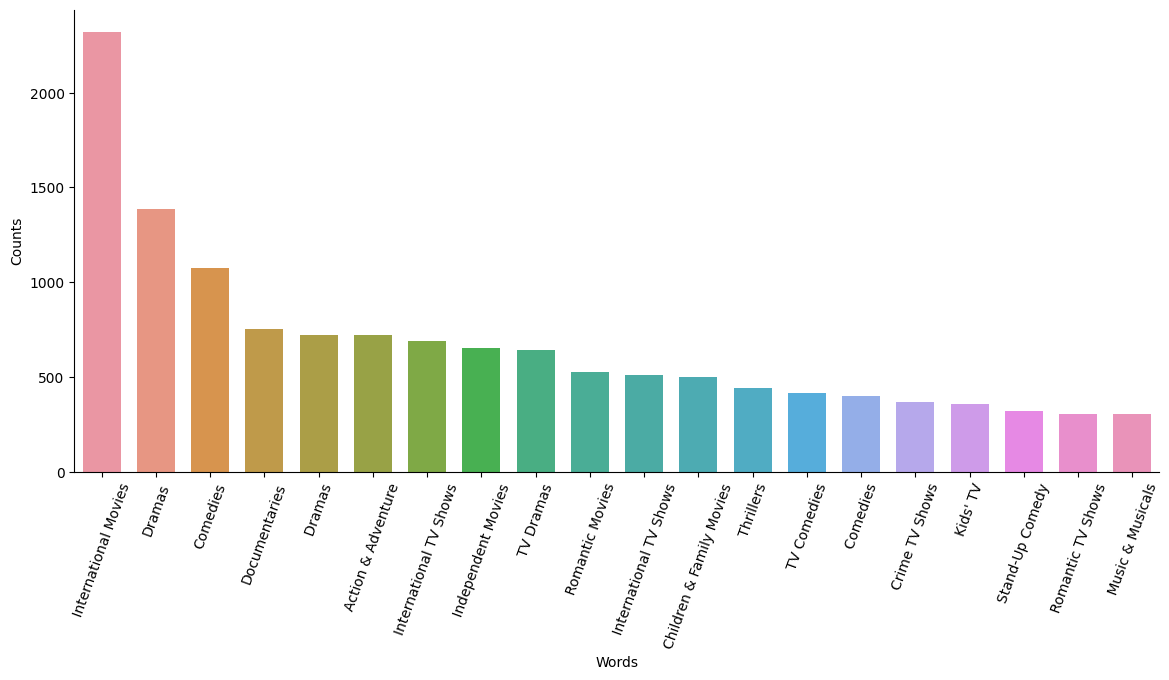

In [ ]:
from collections import Counter
count = Counter()
# Count  the every word
for text in data['listed_in']:
  for word in text.split(','):
    count[word] += 1
    
text_list = count.most_common(20)
# plot a bar graph of most common words
plt.rcParams["figure.figsize"] = (14,6)
ff=pd.DataFrame(text_list, columns=['Words','Counts'])#.set_index('Words').plot(kind='bar',color = sns.color_palette("husl"))
sns.barplot(x=ff['Words'],y=ff['Counts'],width=0.7)
plt.xticks(rotation=70)
sns.despine()

##### 1. Why did you pick the specific chart?

Bar plot is good to visualize and understand the data in this case

##### 2. What is/are the insight(s) found from the chart?

From above charts we found Top genres words in movies/TV Shows-
 
 **International movies ,Dramas ,comedies and Documentaries** are top ranks


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this words tell us that which type/catagory of our movies/TV shows .

#### Chart - 6 - Ratings for Movies & TV Shows(Univriate)

Text(0, 0.5, 'Total Count')

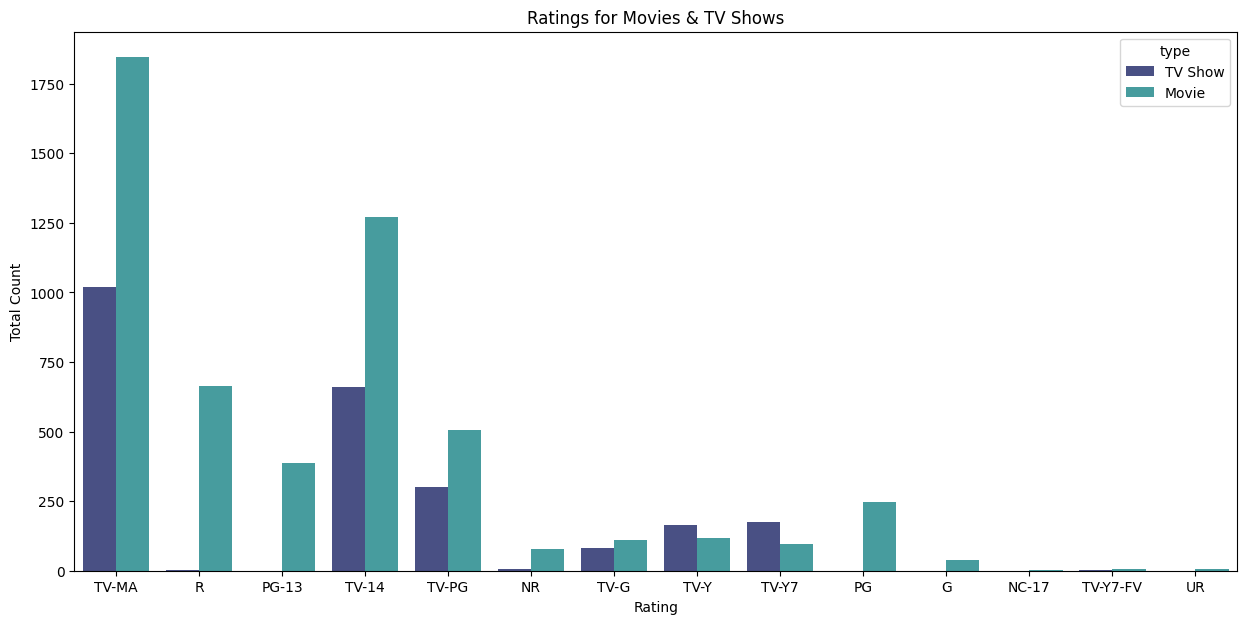

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,7))
sns.countplot(x=data['rating'], hue=data['type'], palette='mako')
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")


##### 1. Why did you pick the specific chart?

Bar plot is well suited for finding the counts and plotting the  values.

##### 2. What is/are the insight(s) found from the chart?

It is found that TV-MA has more ratings that are movies - 1845 ,TVShows 1050 and followed by TV-14 1272, 673 TV SHows and many more....

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph shows that how many type of movies/shows produced.

#### Chart - 8 - Top 20 Actors Who Worked movies 

Text(0, 0.5, 'Movie Count')

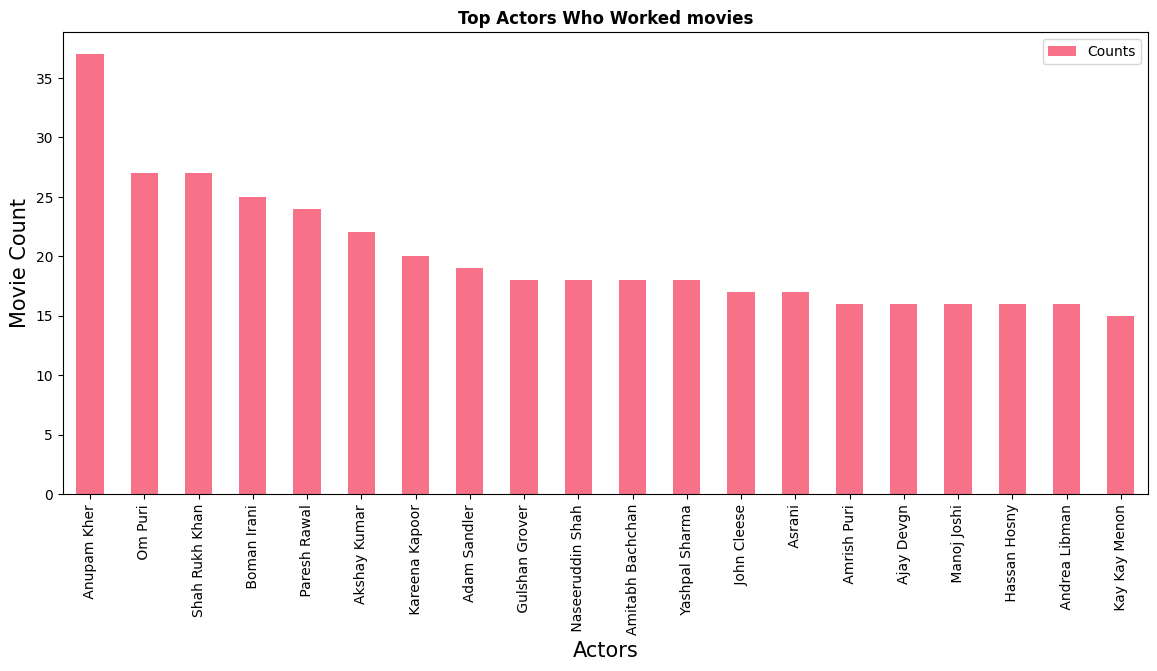

In [ ]:
# Chart - 8 visualization code
from collections import Counter
count = Counter()
m_cast_nomiss=only_movie[only_movie['cast']!='Missing']
# Count  the every word
for text in m_cast_nomiss['cast'].values:  
  for word in text.split(','):
      count[word] += 1
        
text_list = count.most_common(20)

# plot a bar graph of most common words
plt.rcParams["figure.figsize"] = (14,6)
pd.DataFrame(text_list, columns=['Words','Counts']).set_index('Words').plot(kind='bar',color = sns.color_palette("husl"))
plt.title('Top Actors Who Worked movies',fontweight="bold")
plt.xlabel("Actors", fontsize = 15)
plt.ylabel("Movie Count", fontsize = 15)

#sns.barplot(x=ff['Words'],y=ff['Counts'],width=0.7)
#plt.xticks(rotation=70)

##### 1. Why did you pick the specific chart?

bar plot is good to visualize the given scenario

##### 2. What is/are the insight(s) found from the chart?

Top Actors who work maximum movies

1.   Anupam Kher
2.   Om Puri
3.   Shahrukh Khan
4.   Boman Irani





Aworked in maximum movies actors name.



#### Chart - 9 - Month wise content released

In [ ]:
df['month_name_added'].value_counts()

December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: month_name_added, dtype: int64

Text(0, 0.5, 'Count')

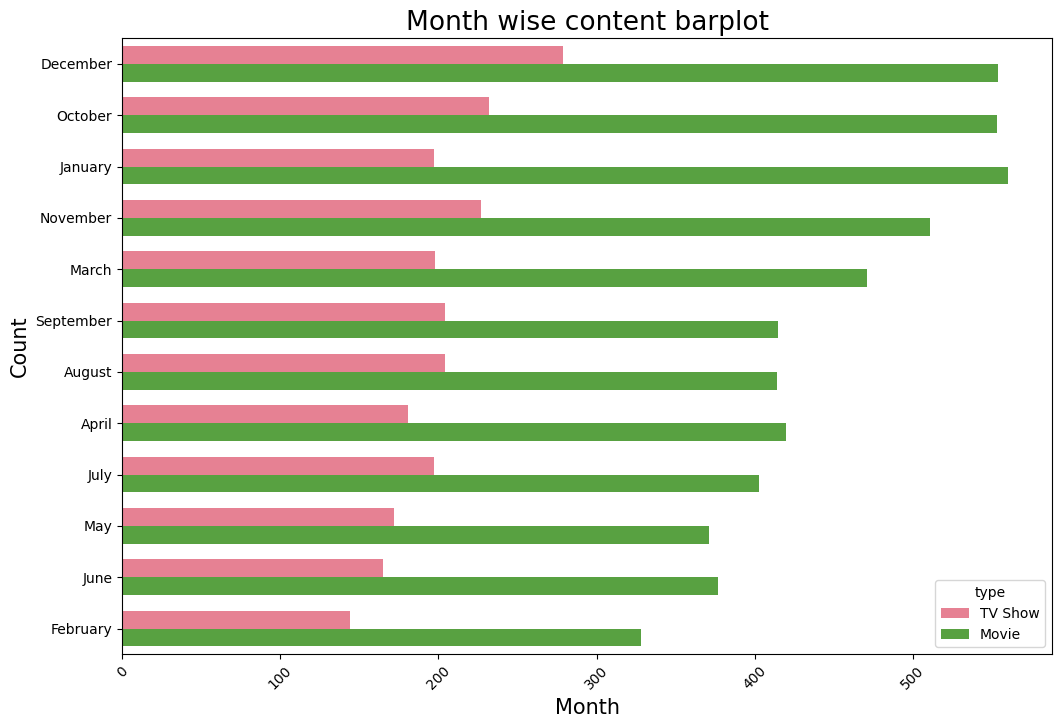

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (12 ,8 ))
sns.countplot(y=df['month_name_added'],data=df ,hue=df['type'] ,width = 0.7,order=df['month_name_added'].value_counts().index,palette=sns.color_palette("husl", 3))
plt.xticks(rotation=45)

plt.title("Month wise content barplot"  ,fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)


##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that production by month.

December, January, October have highly production 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, It shows that monthly production.





#### Chart - 10 - Top Movies/TV Shows Based On Rating

Text(0, 0.5, 'Count')

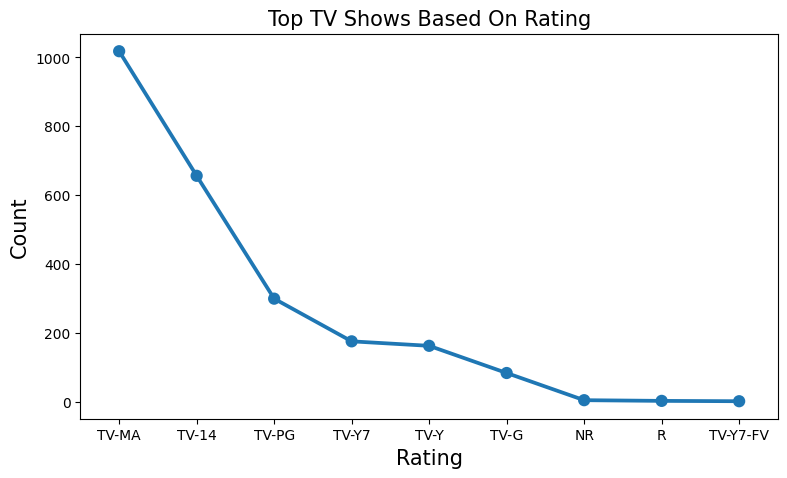

In [ ]:
# Chart - 10 visualization code
#Pointplot on top tv show ratings 
tv_ratings = only_tvshows.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (9,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Shows Based On Rating',size='15')
plt.xlabel("Rating" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
     

Text(0, 0.5, 'Count')

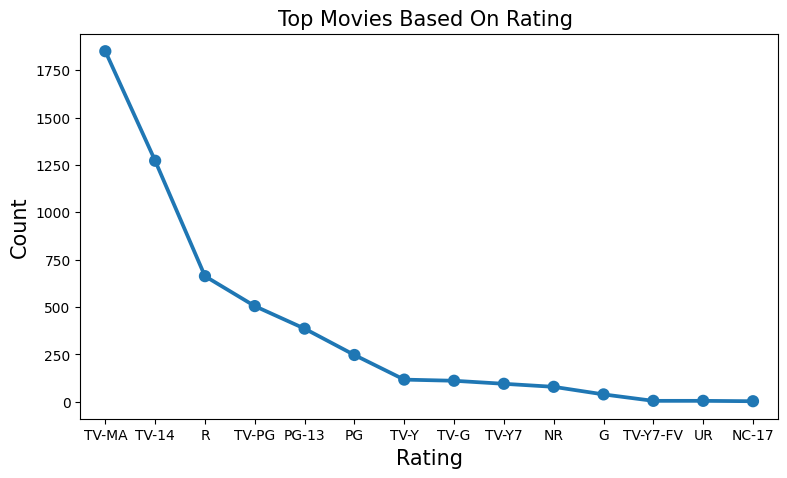

In [ ]:
#Pointplot on top tv show ratings 
tv_ratings = only_movie.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (9,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movies Based On Rating ',size='15')
plt.xlabel("Rating" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot

##### 2. What is/are the insight(s) found from the chart?

Top rated movies/Tv Shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, Production of rated based

#### Chart - 11 Movies/Tv shows added year

Text(0, 0.5, 'Movie/TV Shows Count')

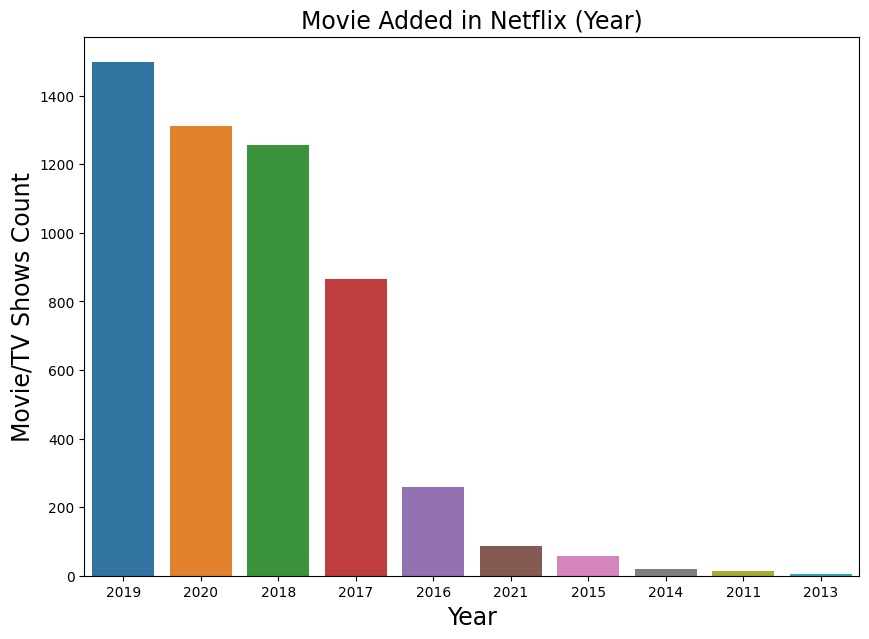

In [ ]:
# Chart - 11 visualization code

plt.figure(figsize=(10,7))

ax=sns.countplot(x="year_added", data=only_movie,order=only_movie['year_added'].value_counts().index[0:10])

plt.title('Movie Added in Netflix (Year)', size=17)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Movie/TV Shows Count', fontsize = 17)

Text(0, 0.5, 'Movie/TV Shows Count')

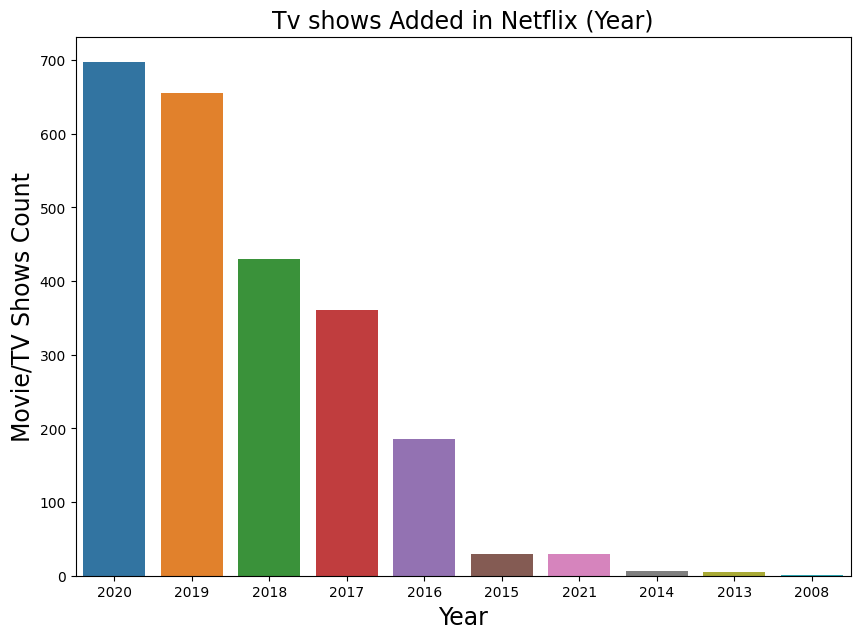

In [ ]:
plt.figure(figsize=(10,7))

ax=sns.countplot(x="year_added", data=only_tvshows,order=only_tvshows['year_added'].value_counts().index[0:10])

plt.title('Tv shows Added in Netflix (Year)', size=17)
plt.xlabel('Year', fontsize = 17)
plt.ylabel('Movie/TV Shows Count', fontsize = 17)

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that Year movies,shows added on Netflix.
2019 and 2020 are 2 top year when movies,shows added. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes,added year wich year when movies,shows added.

#### Chart - 12 TV Shows duration

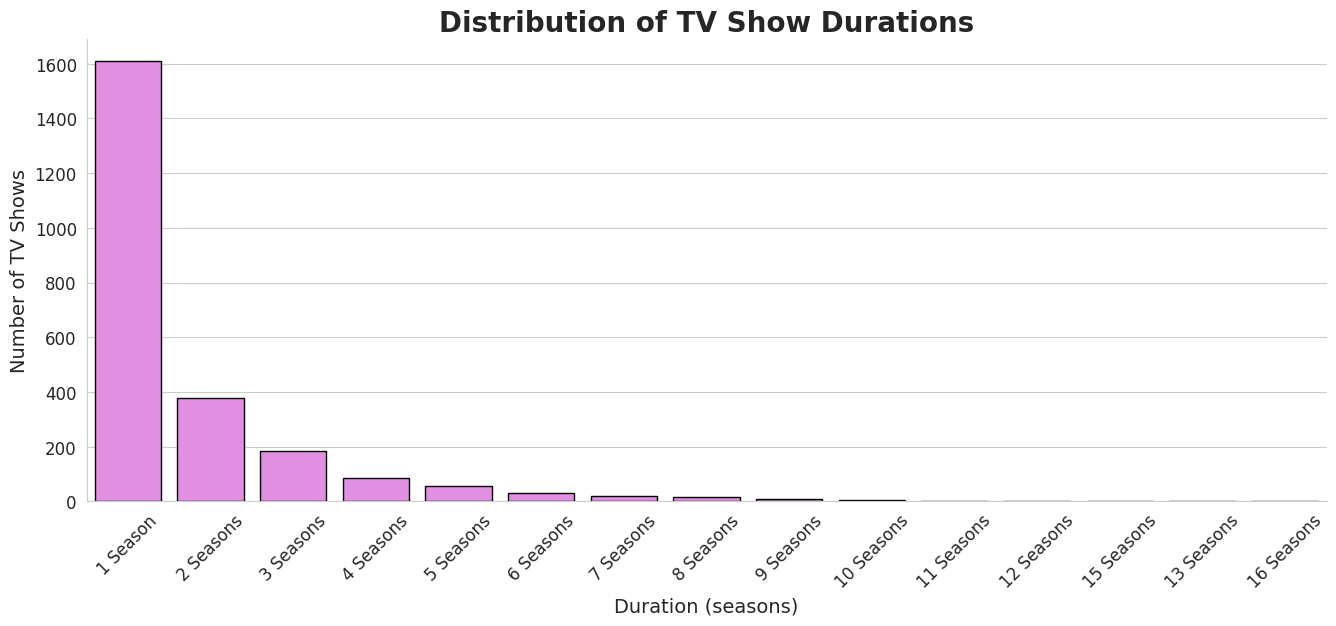

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
sns.countplot(x='duration', data=only_tvshows,
              order=only_tvshows['duration'].value_counts().index,
              color='violet', edgecolor='black')
plt.title('Distribution of TV Show Durations', fontsize=20, fontweight='bold')
plt.xlabel('Duration (seasons)', fontsize=14)
plt.ylabel('Number of TV Shows', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.despine()

     

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that count of TV Shows season.

1 season has most tv shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

no, it just a duration of tv shows.

#### Chart - 13 Released vs Added year of Tv shows/movies

Text(0.5, 1.0, 'Released vs Added year of movies')

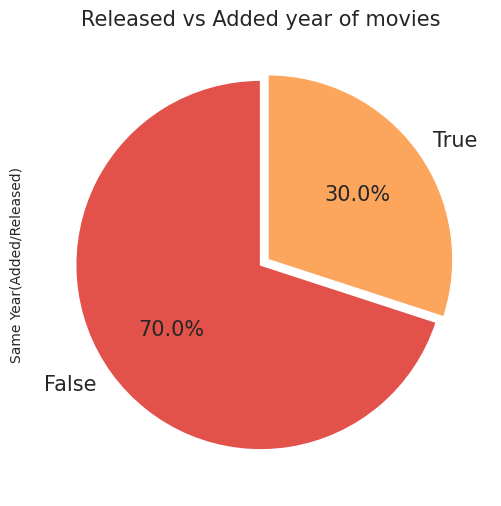

In [ ]:
# Chart - 13 visualization code
only_movie['Same Year(Added/Released)'] = np.where(only_movie['release_year'] == only_movie['year_added'], 'True', 'False')
only_movie

only_movie['Same Year(Added/Released)'].value_counts().plot(kind='pie',
                                                                fontsize=15,
                                                                autopct="%0.1f%%",
                                                                labels=only_movie['Same Year(Added/Released)'].value_counts().index,
                                                                explode=[0,0.05],
                                                                colors = sns.color_palette("Spectral"),
                                                                startangle=90
)
plt.title('Released vs Added year of movies',fontsize=15)

Text(0.5, 1.0, 'Released vs Added year of TV Shows')

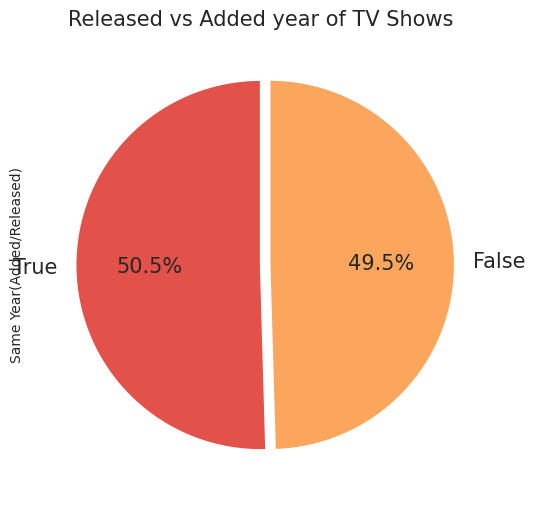

In [ ]:
only_tvshows['Same Year(Added/Released)'] = np.where(only_tvshows['release_year'] == only_tvshows['year_added'], 'True', 'False')
only_tvshows
only_tvshows['Same Year(Added/Released)'].value_counts().plot(kind='pie',
                                                                fontsize=15,
                                                                autopct="%0.1f%%",
                                                                labels=only_tvshows['Same Year(Added/Released)'].value_counts().index,
                                                                explode=[0,0.05],
                                                                colors = sns.color_palette("Spectral"),
                                                                startangle=90
)
plt.title('Released vs Added year of TV Shows',fontsize=15)

##### 1. Why did you pick the specific chart?

pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that comparison of year added and released.

70 % movies has differrent release and added year,
30 % movies has same release and added year.

50 % tv shows has differrent release and added year,
50 % tv shows has same release and added year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, even it shows that how many movies/shows relesed in netflix.

#### Chart - 14 - Correlation Heatmap

<Axes: >

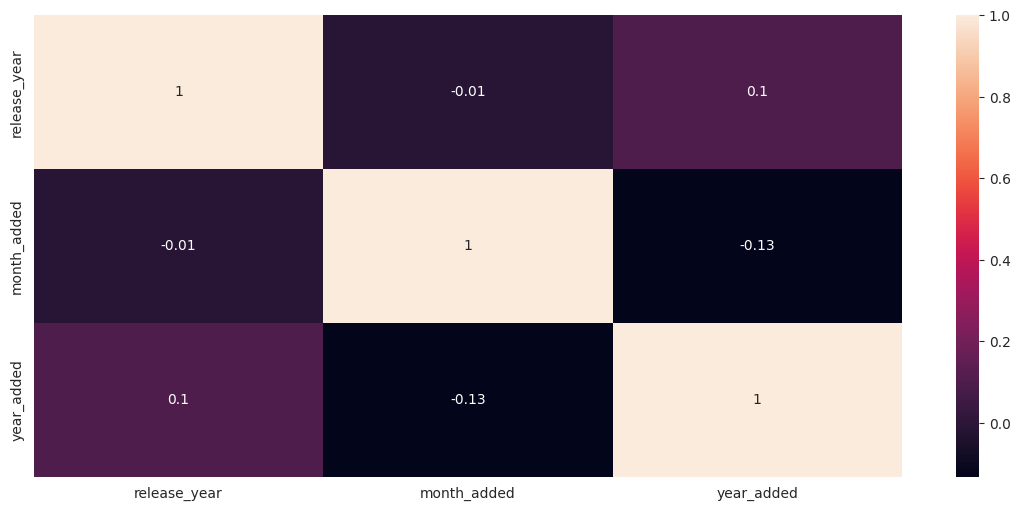

In [ ]:
# Correlation Heatmap visualization code
corr=df.corr()
sns.heatmap(corr,annot=True)

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.

##### 2. What is/are the insight(s) found from the chart?

correlation plot of data frame variable.

#### Chart - 15 - Pair Plot 

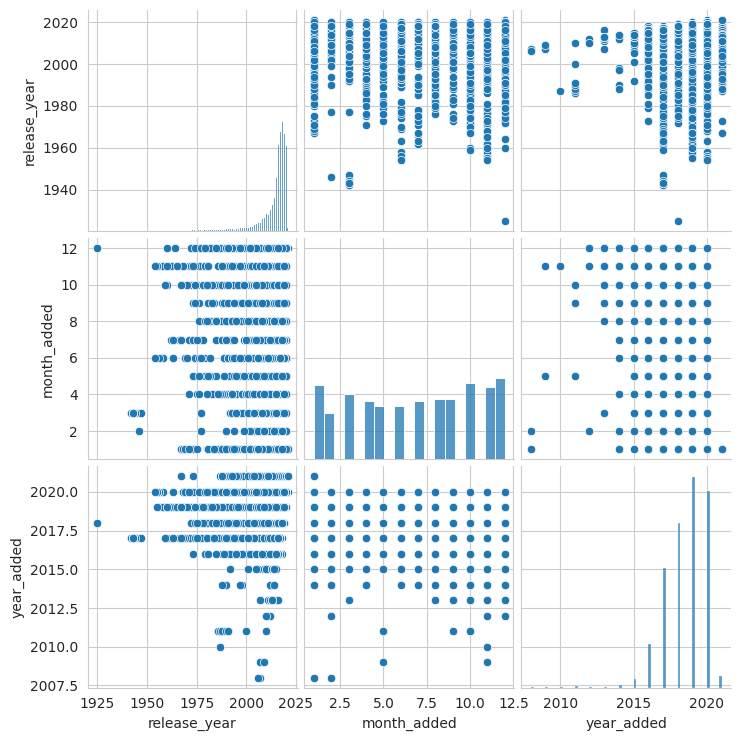

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 

##### 2. What is/are the insight(s) found from the chart?

pairplot of data frame variable.

## ***5. Hypothesis Testing***

NOt REquired

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation

# nan value fiil by forward fill of value
data['director'].fillna(method="ffill",limit=1,inplace=True)

data['cast'].fillna(method="ffill",limit=1,inplace=True)

data['country'].fillna(method="ffill",limit=1,inplace=True)

data['rating'].fillna(method="ffill",limit=1,inplace=True)
data.isnull().sum()

show_id           0
type              0
title             0
director        874
cast            111
country          67
date_added       10
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
# remain nan value fiil by backward fill of value
data['director'].fillna(method="bfill",limit=1,inplace=True)

data['cast'].fillna(method="bfill",limit=1,inplace=True)

data['country'].fillna(method="bfill",limit=1,inplace=True)

data['rating'].fillna(method="bfill",limit=1,inplace=True)
data.isnull().sum()

show_id           0
type              0
title             0
director        360
cast             19
country          23
date_added       10
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
mode_dir=data['director'].mode()
mode_cas=data['cast'].mode()
mode_cou=data['country'].mode()
mode_dat=data['date_added'].mode()
mode_rat=data['rating'].mode()

print(pd.Series( mode_dir.values))
print('\n',mode_cas.values)
print('\n',mode_cou.values)
print('\n',mode_dat.values)
print('\n',mode_rat.values)


0    Raúl Campos, Jan Suter
dtype: object

 ['David Attenborough']

 ['United States']

 ['January 1, 2020']

 ['TV-MA']


In [ ]:
# remain nan value fiil by most frequent value
data['director'].fillna('Raúl Campos, Jan Suter',inplace=True)

data['cast'].fillna('David Attenborough',inplace=True)

data['country'].fillna('United States',inplace=True)

data['date_added'].fillna('January 1, 2020',inplace=True)

data['rating'].fillna('TV-MA',inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We used **ffill, bfill and mode value** of this data because it is catagorical column.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# ALREADY AMNIPLATED IN EDA

#### 2. Feature Selection

In [27]:
# Select your features wisely to avoid overfitting
dd=pd.DataFrame()
pd.set_option('display.max_colwidth', 400)
dd['title']= df['title']
dd['type']= df['type']
dd['country']= df['country']
dd['data']=df['description']+ ', ' +df['listed_in']+ ', ' +df['cast']+ ', ' +df['country']


In [ ]:
#dd=pd.DataFrame()
#pd.set_option('display.max_colwidth', 400)
#dd['title']= data['title']
#dd['type']= data['type']
#dd['country']= data['country']
#dd['data']=data['description']+ ', ' +data['listed_in']+ ', ' +data['cast']+ ', ' +data['country']
#

In [ ]:
dd

,title,type,country,data
0,3%,TV Show,Brazil,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor., International TV Shows, TV Dramas, TV Sci-Fi & Fantasy, João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi, Brazil"
1,7:19,Movie,Mexico,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive., Dramas, International Movies, Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato, Mexico"
2,23:59,Movie,Singapore,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp., Horror Movies, International Movies, Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim, Singapore"
3,9,Movie,United States,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group., Action & Adventure, Independent Movies, Sci-Fi & Fantasy, Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane, United States"
4,21,Movie,United States,"A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack., Dramas, Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin, United States"
...,...,...,...,...
7782,Zozo,Movie,"Sweden, Czech Republic, United Kingdom, Denmark, Netherlands","When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents., Dramas, International Movies, Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad, Sweden, Czech Republic, United Kingdom, Denmark, Netherlands"
7783,Zubaan,Movie,India,"A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past., Dramas, International Movies, Music & Musicals, Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy, India"
7784,Zulu Man in Japan,Movie,NaN,NaN
7785,Zumbo's Just Desserts,TV Show,Australia,"Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize., International TV Shows, Reality TV, Adriano Zumbo, Rachel Khoo, Australia"


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

**Description, Cast, Rating, listed_in and country** choose for recommendation.

### 5. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [28]:
# Lower Casing
def case_low(text):
  return " ".join([i.lower() for i in text.split()])

In [29]:
dd['clean_data'] = dd['data'].apply(case_low)


#### 2. Removing Punctuations

In [30]:
# Remove Punctuations
import string
import nltk
from nltk.corpus import stopwords


In [31]:
def remove_punc(data):
  translator = str.maketrans('', '', string.punctuation)
  return data.translate(translator)

In [32]:
dd['clean_data']=dd['data'].apply(remove_punc)


In [33]:
dd

,title,type,country,data,clean_data
0,3%,TV Show,Brazil,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor., International TV Shows, TV Dramas, TV Sci-Fi & Fantasy, João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi, Brazil",In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor International TV Shows TV Dramas TV SciFi Fantasy João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso Frateschi Brazil
1,7:19,Movie,Mexico,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive., Dramas, International Movies, Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato, Mexico",After a devastating earthquake hits Mexico City trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive Dramas International Movies Demián Bichir Héctor Bonilla Oscar Serrano Azalia Ortiz Octavio Michel Carmen Beato Mexico
2,23:59,Movie,Singapore,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp., Horror Movies, International Movies, Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim, Singapore",When an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret thats haunting their jungle island training camp Horror Movies International Movies Tedd Chan Stella Chung Henley Hii Lawrence Koh Tommy Kuan Josh Lai Mark Lee Susan Leong Benjamin Lim Singapore
3,9,Movie,United States,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group., Action & Adventure, Independent Movies, Sci-Fi & Fantasy, Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane, United States",In a postapocalyptic world ragdoll robots hide in fear from dangerous machines out to exterminate them until a brave newcomer joins the group Action Adventure Independent Movies SciFi Fantasy Elijah Wood John C Reilly Jennifer Connelly Christopher Plummer Crispin Glover Martin Landau Fred Tatasciore Alan Oppenheimer Tom Kane United States
4,21,Movie,United States,"A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack., Dramas, Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin, United States",A brilliant group of students become cardcounting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack Dramas Jim Sturgess Kevin Spacey Kate Bosworth Aaron Yoo Liza Lapira Jacob Pitts Laurence Fishburne Jack McGee Josh Gad Sam Golzari Helen Carey Jack Gilpin United States
...,...,...,...,...,...
7782,Zozo,Movie,"Sweden, Czech Republic, United Kingdom, Denmark, Netherlands","When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents., Dramas, International Movies, Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad, Sweden, Czech Republic, United Kingdom, Denmark, Netherlands",When Lebanons Civil War deprives Zozo of his family hes left with grief and little means as he escapes to Sweden in search of his grandparents Dramas International Movies Imad 

#### 3. Removing URLs & Removing words and digits contain digits.

In [34]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  return " ".join([i for i in text.split() if 'ht' not in i])

In [35]:
import re 
def remove_digit(text):
  return " ".join([re.sub('[0-9]','',i) for i in text.split()])

In [36]:
dd['clean_data']=dd['clean_data'].apply(remove_url)


In [37]:
#dd['clean_data']=dd['clean_data'].apply(remove_digit)


#### 4. Removing Stopwords & Removing White spaces

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# Remove Stopwords
s_words = stopwords.words('english')
s_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in s_words]
  return " ".join(text)

In [41]:
# Remove White spaces
def space_rem(text):
    text = [word.strip() for word in text.split()]
    return " ".join(text)

In [42]:
dd['clean_data']=dd['clean_data'].apply(stopwords)


In [43]:
dd['clean_data']=dd['clean_data'].apply(space_rem)


#### 6. Rephrase Text

In [44]:
# Rephrase Text

#### 5. Tokenization

In [45]:
# Tokenization
 #whitespace tokenizer
tokenize = WhitespaceTokenizer()

# Now applying it on the target column
dd['clean_data']= dd['clean_data'].apply(tokenize.tokenize)
dd['clean_data'].head(5)

0    [future, elite, inhabit, island, paradise, far, crowded, slums, get, one, chance, join, 3, saved, squalor, international, tv, shows, tv, dramas, tv, scifi, fantasy, joão, miguel, bianca, comparato, michel, gomes, rodolfo, valente, vaneza, oliveira, rafael, lozano, viviane, porto, mel, fronckowiak, sergio, mamberti, zezé, motta, celso, frateschi, brazil]
1                                                                                                 [devastating, earthquake, hits, mexico, city, trapped, survivors, walks, life, wait, rescued, trying, desperately, stay, alive, dramas, international, movies, demián, bichir, héctor, bonilla, oscar, serrano, azalia, ortiz, octavio, michel, carmen, beato, mexico]
2                                                         [army, recruit, found, dead, fellow, soldiers, forced, confront, terrifying, secret, thats, haunting, jungle, island, training, camp, horror, movies, international, movies, tedd, chan, stella, chung, henley, hii, lawrenc

#### 6. Text Normalization

In [46]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stem_proc(text):    
    text = [stemmer.stem(i) for i in text]
    return text 

In [47]:
dd['clean_data']= dd['clean_data'].apply(stem_proc)


##### Which text normalization technique have you used and why?

Answer Here.

#### 7. Part of speech tagging

In [48]:
# POS Taging
nltk.download('averaged_perceptron_tagger')
def pos(text):
  text=nltk.pos_tag(text)
  return text

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [49]:
#dd['pos_clean_data']= dd['clean_data'].apply(pos)

In [50]:
#dd[['clean_data','pos_clean_data']].head()

#### 8. Text Vectorization

In [51]:
def join(text):
  return ' '.join(text)

In [52]:
dd['clean_data']= dd['clean_data'].apply(join)

In [53]:
# Vectorizing Text
count_vectorizer = CountVectorizer()

def vector():
  return count_vectorizer.fit_transform(dd['clean_data'])

vector()
dic = count_vectorizer.vocabulary_.items()

In [54]:
key = []
count = []
#count of every word
for i,j in dic:
  key.append(i)
  count.append(j)

vocabul=pd.DataFrame(count,index=key).rename(columns={0:'Count'})
vocabul.sample(10)

,Count
amg,1670
kay,18558
paramej,26647
herr,15262
slavko,32930
nypd,25541
softwar,33137
carpio,6124
mcmonagl,22671
hilario,15402


##### Which text vectorization technique have you used and why?

I used CountVectorizer Technique for Bag-of-Word(BOW) because countvectorization works better in short/medium data set.

And TF-IDF Technique works better in Large data set.

##### vector form to array

In [55]:
x=vector()
X=x.toarray()

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [ ]:
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([5.20528176e-02, 2.49302652e-02, 1.07671296e-02, ...,
       6.26718466e-35, 8.84421633e-36, 4.60540208e-36])

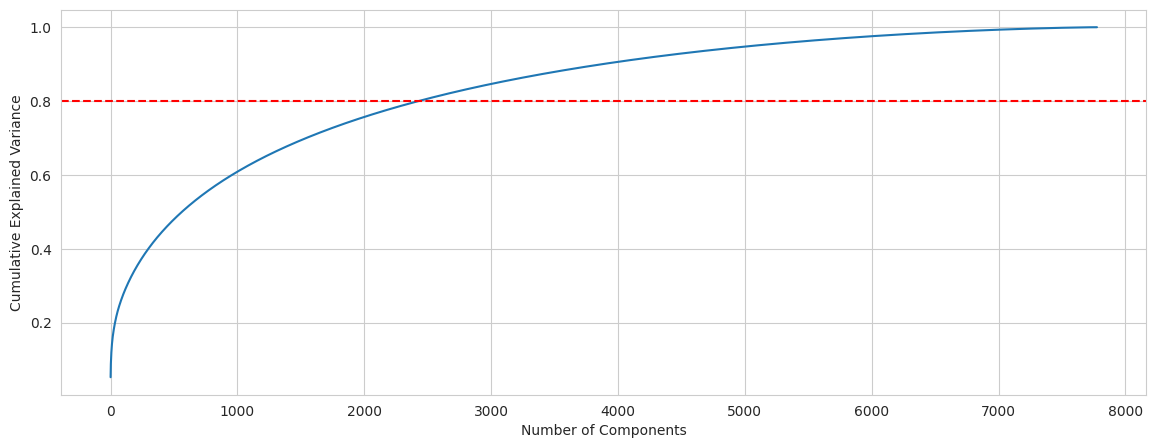

In [ ]:
#figure with specified size and resolution
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(14,5))

#Plotting cumulative explained variance versus number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y= 0.8, color='red', linestyle='--')
#plt.axvline(x= 3000, color='green', linestyle='--')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

##### Do you think that dimensionality reduction is needed? Explain Why?

YES, because its variace or components very high.

We found that variance is explained by about 8000 components.

Also, more than 80% of the variance is explained just by 2500 components.

Hence to simplify the model, and reduce dimensionality.

 we can take the top 2500 components, which will still be able to capture more than 80% of variance.

In [56]:
from sklearn.decomposition import PCA

#PCA object with 80% variance threshold
pca_tuned = PCA(n_components=2500)


#Fitting PCA on the data and transform it
x_trans = pca_tuned.fit_transform(X)

#shape of the transformed data
print("Transformed data shape:", x_trans.shape ,'\n')
x_trans

Transformed data shape: (7777, 2500) 



array([[ 2.46939081,  0.52205599, -0.36677226, ..., -0.02209439,
        -0.01023338,  0.00947025],
       [-0.65092933,  0.97436454, -0.0534206 , ...,  0.03349998,
         0.08524204,  0.13743444],
       [-0.94305917,  1.21028539, -0.08861384, ...,  0.05088669,
        -0.00495194,  0.01109837],
       ...,
       [-0.78294679,  0.58394515,  1.8497936 , ...,  0.08520402,
         0.01450049, -0.00429129],
       [ 1.72144275,  0.36620935,  0.38652136, ..., -0.07696938,
        -0.02947234,  0.08057606],
       [-0.78549185, -1.8271334 ,  1.24814608, ...,  0.00855878,
        -0.03974436, -0.01386047]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA for dimension reduction.

PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables.

```
PCA improves the performance of the ML algorithm as it eliminates correlated variables that don't contribute in any decision making. 
PCA helps in overcoming data overfitting issues by decreasing the number of features.
```



### 8. Data Splitting
Not Required

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***



### ML Model - 1

#### Elbow method for clustering

225543.4655121537
213166.66827486773
207873.91089635532
205936.69893451384
204483.01556659525
203888.76168747563
203200.4282229389
201882.218049651
200395.79943488442
199707.83448834502
200194.3190744319
198660.26721223845
198337.27770506198
197662.36176165816


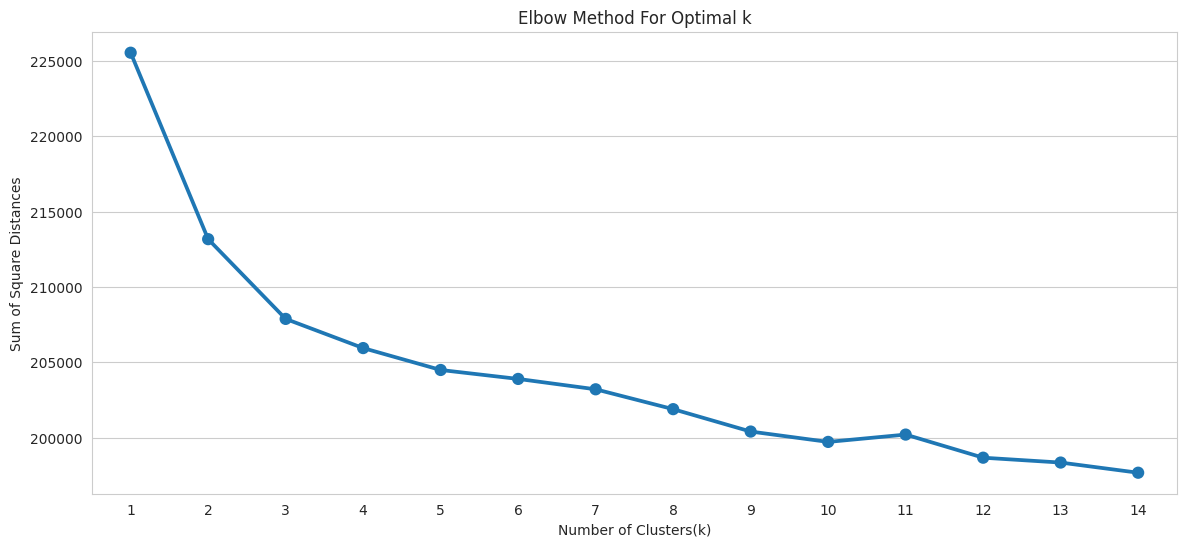

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x_trans)
    sum_of_sq_dist[k] = km.inertia_
    print(km.inertia_)
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()



**The curve looks like an elbow. In the above plot, the elbow is at k=2 or 3 (i.e., the Sum of squared distances falls suddenly).**

For optimal no of k value(2/3) will get by Silhouette Analysis.

#### Silhouette analysis For Optimal k - KMeans clustering

In [57]:
silhouette_av = []
# range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for n_clusters in range(2, 12):
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(x_trans)
  
  centers = clusterer.cluster_centers_
  score = silhouette_score(x_trans, preds)
  silhouette_av.append(score)
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))



For n_clusters = 2, silhouette score is 0.08297169315412949
For n_clusters = 3, silhouette score is 0.03702197610072429
For n_clusters = 4, silhouette score is 0.027388263928245865
For n_clusters = 5, silhouette score is -0.00985953345295121
For n_clusters = 6, silhouette score is 0.01706974939177879
For n_clusters = 7, silhouette score is 0.01434553152352367
For n_clusters = 8, silhouette score is 0.009551352352879898
For n_clusters = 9, silhouette score is -0.04693158870454192
For n_clusters = 10, silhouette score is -0.02163836763412078
For n_clusters = 11, silhouette score is -0.037166187926201855


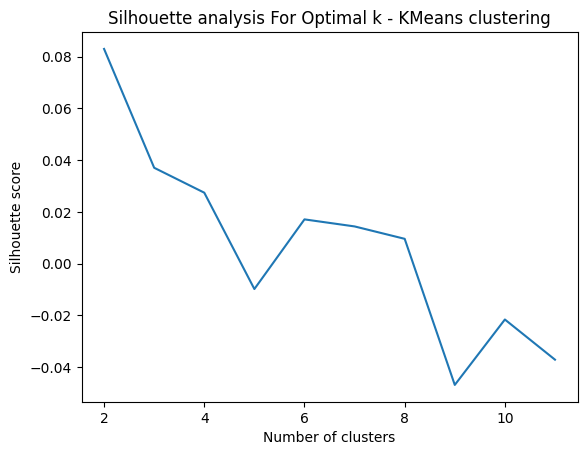

In [58]:
plt.plot(range(2,12), silhouette_av)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

I got maximum Silhouette score 0.083031.. at 2 clusters.

So i fitted 2 value of n_cluster in KMEANS algorithm. 

In [59]:
# Clustering the data into 2 clusters as maximum silhouette score is 0.08369077229896474
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(x_trans)
     

KMeans(n_clusters=2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_trans, kmeans.labels_)
print(f'Kmeans distortion = {kmeans_distortion}')
print(f'Silhouette Score = {kmeans_silhouette_score}')

Kmeans distortion = 213172.17668657372
Silhouette Score = 0.08297169315412949


In [61]:
dd['kmeans_cluster'] = kmeans.labels_


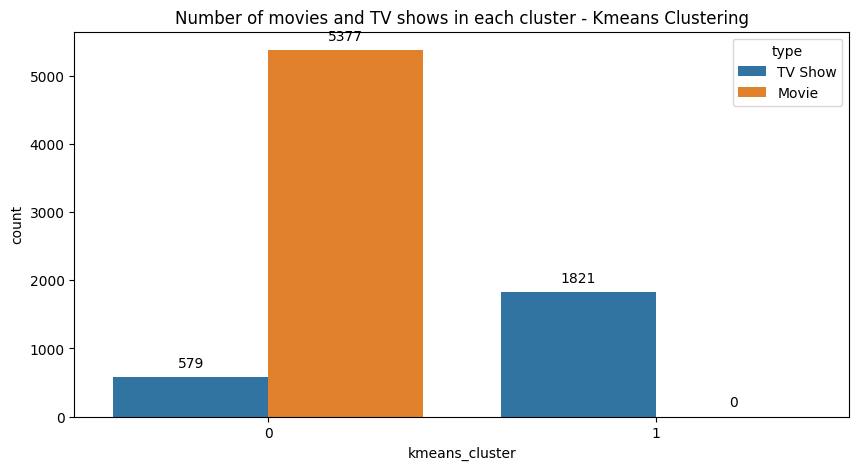

In [62]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=dd, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  


### ML Model - 2

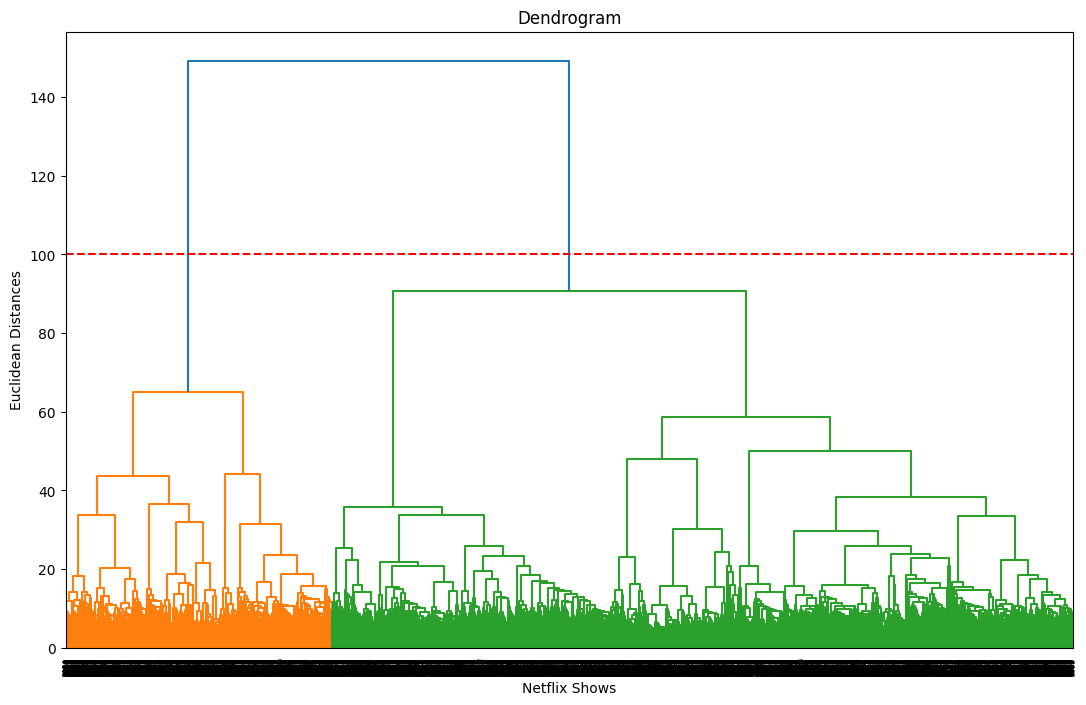

In [63]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x_trans, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y=100, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show() 

# find largest vertical distance we can make without crossing any other horizontal line

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcfit=hierarchical.fit_predict(x_trans)
     

In [65]:
dd['HC_cluster']=hierarchical.labels_

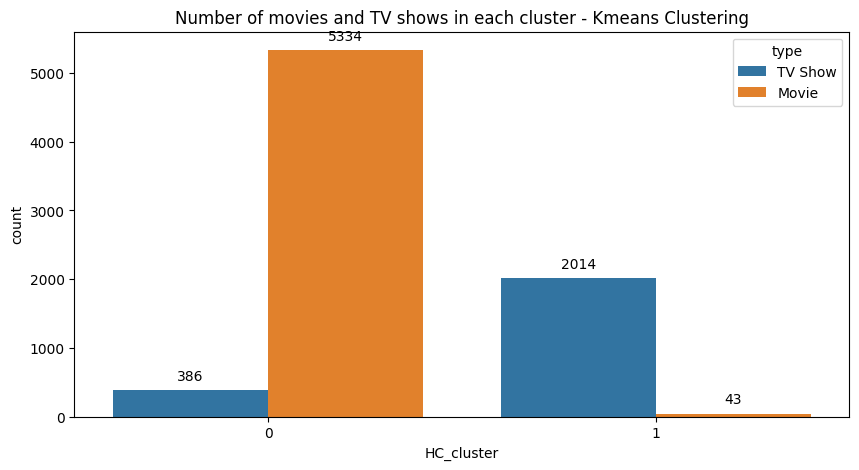

In [66]:
plt.figure(figsize=(10,5))
q = sns.countplot(x='HC_cluster',data=dd, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

###  Recommendation System

We can build a simple content based recommender system based on the similarity of the shows.

If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.

To get the similarity score of the shows, we can use cosine similarity, linear_kernel, rbf_kernel, sigmoid_kernel, polynomial_similarity...

In [67]:
recommend_df = dd.copy()

# reseting index
recommend_df.reset_index(inplace=True)

# dropping index column
recommend_df = recommend_df.drop(columns=['index'],axis=1)
recommend_df.head()

,title,type,country,data,clean_data,kmeans_cluster,HC_cluster
0,3%,TV Show,Brazil,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor., International TV Shows, TV Dramas, TV Sci-Fi & Fantasy, João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi, Brazil",futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil,1,1
1,7:19,Movie,Mexico,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive., Dramas, International Movies, Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato, Mexico",devast earthquak hit mexico citi trap survivor walk life wait rescu tri desper stay aliv drama intern movi demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico,0,0
2,23:59,Movie,Singapore,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp., Horror Movies, International Movies, Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim, Singapore",armi recruit found dead fellow soldier forc confront terrifi secret that haunt jungl island train camp horror movi intern movi tedd chan stella chung henley hii lawrenc koh tommi kuan josh lai mark lee susan leong benjamin lim singapor,0,0
3,9,Movie,United States,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group., Action & Adventure, Independent Movies, Sci-Fi & Fantasy, Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane, United States",postapocalypt world ragdol robot hide fear danger machin extermin brave newcom join group action adventur independ movi scifi fantasi elijah wood john c reilli jennif connelli christoph plummer crispin glover martin landau fred tatascior alan oppenheim tom kane unit state,0,0
4,21,Movie,United States,"A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack., Dramas, Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin, United States",brilliant group student becom cardcount expert intent swindl million las vega casino play blackjack drama jim sturgess kevin spacey kate bosworth aaron yoo liza lapira jacob pitt laurenc fishburn jack mcgee josh gad sam golzari helen carey jack gilpin unit state,0,0


In [68]:
def recommend(movie, sim, output_name):
    '''
    This function recommends top 10 movies similar to the input movie based on their similarity scores.
    '''
    # Display the input movie name
    print('--'*30)
    print(f'recommendations based on {output_name}')
    print('--'*30)
    print(f"Since you liked {movie}, you may also like: \n")

    # Find the index position of the input movie
    index = recommend_df[recommend_df['title'] == movie].index[0]

    # Sort the movies based on similarity score to find distances from recommended movies
    distances = sorted(list(enumerate(sim[index])), reverse=True, key=lambda x:x[1])
    
    #print(distances)
    # List the top 5 recommended movies
    for i in distances[1:11]:
        print(recommend_df.iloc[i[0]].title)
    print('\n')
    

In [72]:
# calculate cosine similarity on transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
# setting cos_similarity
cos_similarity = cosine_similarity(x)

# setting linear_kernel
lin_similarity = linear_kernel(x)

# setting rbf_kernel0
rbf_similarity = rbf_kernel(x)

#setting sigmoid_kernel
sigmoid_similarity = sigmoid_kernel(x)

# setting polynomial_kernel
polynomial_similarity = polynomial_kernel(x)



In [73]:
# getting recommendations for the movie
recommend('Aitraaz', cos_similarity, 'Cosine similarity')
recommend('Aitraaz', lin_similarity,'linear kernel')
recommend('Aitraaz', rbf_similarity,'radial basis function (RBF) kernel')
recommend('Aitraaz', sigmoid_similarity,'sigmoid kernel')
recommend('Aitraaz', polynomial_similarity,' polynomial kernel')


------------------------------------------------------------
recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Aitraaz, you may also like: 

The Shaukeens
Welcome
Main aurr Mrs. Khanna
Chup Chup Ke
Bewafaa
Manoranjan
Fida
Jab We Met
Golmaal Returns
Khushi


------------------------------------------------------------
recommendations based on linear kernel
------------------------------------------------------------
Since you liked Aitraaz, you may also like: 

Ek Main Aur Ekk Tu
Bewafaa
Humko Deewana Kar Gaye
Main aurr Mrs. Khanna
Welcome
Chup Chup Ke
Dil Vil Pyaar Vyaar
Jab We Met
Manoranjan
Bhagam Bhag


------------------------------------------------------------
recommendations based on radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Aitraaz, you may also like: 

The Shaukeens
Chadi Jawani Budhe Nu
The Human Factor: The Untold Story of the Bombay Fil

In [71]:
# getting recommendations for the movie
recommend('Thor: Ragnarok', cos_similarity, 'Cosine similarity')
recommend('Thor: Ragnarok', lin_similarity,'linear kernel')
recommend('Thor: Ragnarok', rbf_similarity,'radial basis function (RBF) kernel')
recommend('Thor: Ragnarok', sigmoid_similarity,'sigmoid kernel')
recommend('Thor: Ragnarok', polynomial_similarity,' polynomial kernel')

------------------------------------------------------------
recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Thor: Ragnarok, you may also like: 

Avengers: Infinity War
IO
Clash of the Titans
Left Behind
The Book of Eli
Resident Evil: Afterlife
Indiana Jones and the Kingdom of the Crystal Skull
Dragonheart: Battle for the Heartfire
Seventh Son
Mowgli: Legend of the Jungle


------------------------------------------------------------
recommendations based on linear kernel
------------------------------------------------------------
Since you liked Thor: Ragnarok, you may also like: 

Avengers: Infinity War
The Dark Crystal: Age of Resistance
Clash of the Titans
Love, Death & Robots
Trollhunters
Inception
Left Behind
Mowgli: Legend of the Jungle
Resident Evil: Afterlife
Seventh Son


------------------------------------------------------------
recommendations based on radial basis function (RBF) kernel
-------------

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
df_export = dir + 'NETFLIX MOVIES & SHOWS.csv'
X_export = dir + 'X.csv'
# Create a DataFrame from the transformed data
X_to_export = pd.DataFrame(X)

# Save the DataFrame to a CSV file
X_to_export.to_csv('X_export', index=False)
recommender_df.to_csv('df_export', index=False)
     

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# the same dataframe can be loaded and recommeder can use the dataframe

# Load the transformed data from a CSV file
recom_df = pd.read_csv('df_export')
X_import = pd.read_csv('X_export')

# Convert the DataFrame to a NumPy array
X_imported = X_import.values


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Our objective was to cluster shows based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 2 shows to users based on their viewing history.

We began our exploration with a dataset consisting of 7787 records and 11 attributes, with a focus on missing value imputation and exploratory data analysis (EDA). The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we selected 3 key attributes: director, cast, country, genre, rating, and description. These attributes were transformed into a 9000-feature TFIDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. We captured more than 80% of the variance by reducing the components to 2500.

Next, we used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method and Silhouette score analysis confirmed that the optimal number of clusters was 2 for K-Means. However, Agglomerative clustering suggested 2 clusters, which we visualized with a dendrogram.

We continued our efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity. This system offers personalized recommendations based on the type of show the user has watched and provides the user with 5 top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***